# Performing financial analytics on time series
In  this section, we will visualize some statistical properties of time series data used in financial analytics


# Plotting returns
A simple method for calculating returns in pandas is pct_change;
where the percentage change from the previous row is computed for
every row in the DataFrame.

In this example, we use ABN stock data to plot a simple graph of daily percentage returns:

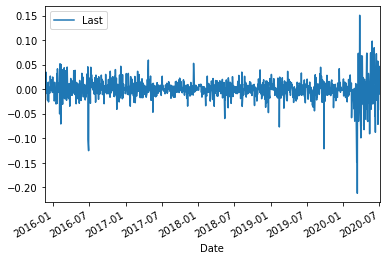

In [6]:
%matplotlib inline
import quandl

QUANDL_API_KEY = '54oxqVQ7BxSJHyGeFd6s'
quandl.ApiConfig.api_key = QUANDL_API_KEY

df = quandl.get('EURONEXT/ABN.4')
# .4 is used to specify the retrieval of only the fourth column of the dataseet
# which contains the last prices

daily_changes = df.pct_change(periods = 1)
daily_changes.plot()

# Plotting cumulative returns
The cumsum method of pandas returns the cumulative sum over a DataFrame
In this Example, we plot the cumulative sum of daily_changes of the ABN calculated previously:

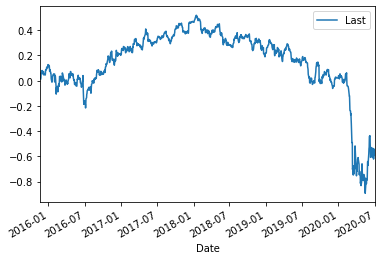

In [7]:
df_cumsum = daily_changes.cumsum()
df_cumsum.plot()

# Plotting a histogram
Histograms tell us how distributed the data is.
In this example, we are interested in how distributed the daily returns of ABN are.
We use the hist() method on a DataFrame with a bin size of 50:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE1F25CC88>]],
      dtype=object)

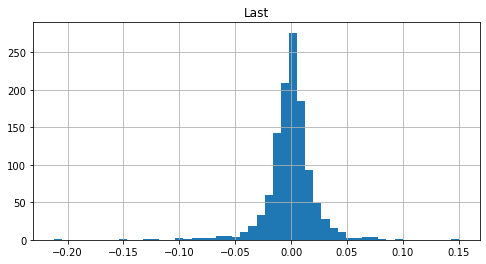

In [11]:
daily_changes.hist(bins= 50, figsize= (8,4))

In [10]:
# we can use the describe() method to summarize the central tendency, dispersion, and shape of a dataset's distribution:

daily_changes.describe()

,Last
count,1175.000000
mean,-0.000467
std,0.021836
min,-0.212453
25%,-0.009147
50%,0.000274
75%,0.009149
max,0.150552


# Analysis:
From the histogram, the returns tend to be distributed about the mean of 0.0
, or 0.000467 to be exact. Besides this miniscule skew to the right, the data appears
fairly symmetrical and normally distributed.

The standard deviation is 0.021836. The percentile tell us that 25% of
the points fall below 0.009147, 50% below 0.000274 and 75% below 0.009149.

# Plotting volatility

One way of analyzing the distribution of returns is measuring its standard deviation.
Standard deviation is a measure of dispersion around the mean. A high standard deviation
value for past returns indicates a high historical volatility(instability) of stock price movement.

The rolling() function of pandas helps us to visualize specific time series operations over a period of time.
To calculate standard deviations of the percentage change of returns in our computed ABN dataset, we use the std() method,
which returns a DataFrame or Series Object that can be used to plot a chart.
The following example illustrates this:

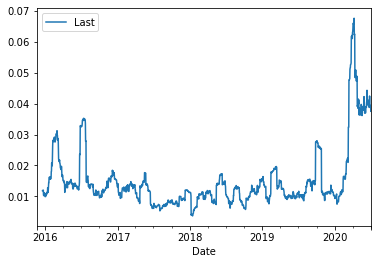

In [23]:
df_filled = df.asfreq('D',method='ffill')
df_returns = df_filled.pct_change()
df_std = df_returns.rolling(window = 30, min_periods = 30).std()
df_std.plot()